In [ ]:
import pandas as pd
df=pd.read_csv('C:/Users/abhi0/Downloads/Tweets.csv')

In [17]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [18]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [19]:
df['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [25]:
df['text'][4]

"@VirginAmerica and it's a really big bad thing about it"

In [26]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [27]:
len(df)

14640

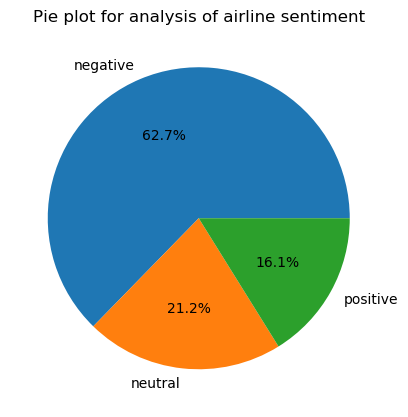

In [185]:
df['airline_sentiment'].value_counts()
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(5,5),dpi=100)
ax.pie(df['airline_sentiment'].value_counts().values,labels=df['airline_sentiment'].value_counts().keys(),autopct='%1.1f%%')
plt.title('Pie plot for analysis of airline sentiment')
plt.show()


**Pie plot showing the distribution of airline sentiment. It seems that 'negative' sentiment was more common compared to the other two.**

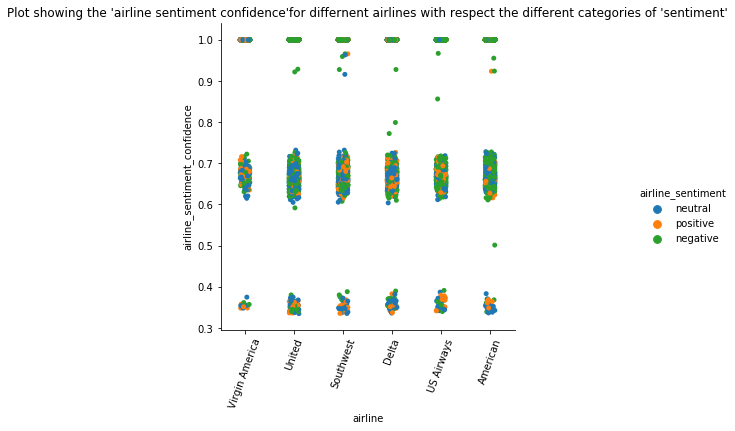

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(y='airline_sentiment_confidence',x='airline',hue='airline_sentiment',data=df)
plt.tick_params(axis='x',rotation=70)
plt.title('Plot showing the \'airline sentiment confidence\'for differnent airlines with respect the different categories of \'sentiment\'')
plt.show()

**It seems that 'higher sentiment confidence' seem to comprise mostly of negative tweets followed by neutral tweets. 'Delta' airlines seem to have the higher number of tweets with confidence of 0.8 and those tweets are generally negative tweets.'United' airlines seem to have the most number of neutral tweets.**

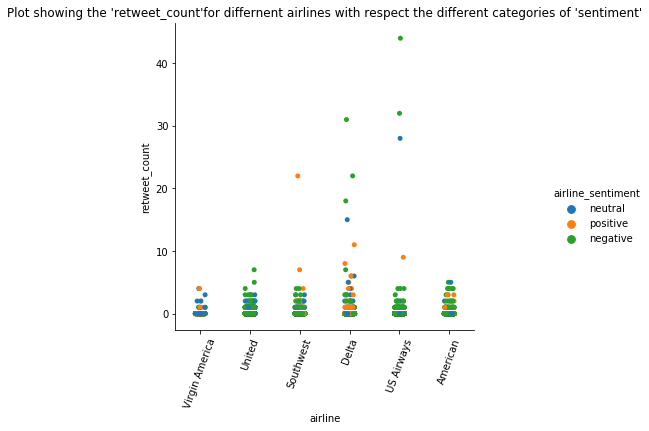

In [188]:
sns.catplot(y='retweet_count',x='airline',hue='airline_sentiment',data=df)
plt.tick_params(axis='x',rotation=70)
plt.title('Plot showing the \'retweet_count\'for differnent airlines with respect the different categories of \'sentiment\'')
plt.show()

**'US Airways' followed by 'Delta' seem to have the highest retweet count and the higher end of the number of retweets seem to be more generally negative. Only for 'Southwest' the tweets with large re-tweet count seem to be positive. 'American airlines','Virgin America' and 'United' don't seem to have a high re-tweet count** 

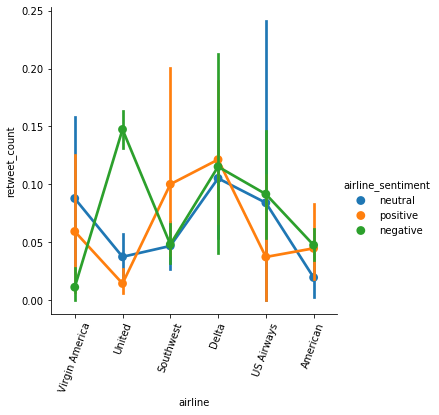

In [184]:
sns.catplot(y='retweet_count',x='airline',hue='airline_sentiment',kind='point',data=df)
plt.tick_params(axis='x',rotation=70)
plt.show()

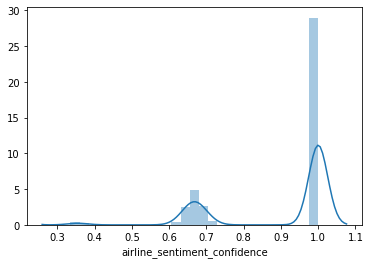

In [51]:
sns.distplot(df['airline_sentiment_confidence'],hist=True)
plt.show()

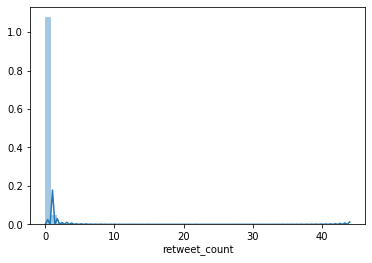

In [50]:
sns.distplot(df['retweet_count'],hist=True)
plt.show()

**Negatively skewed distribution for 'retweet_count'**

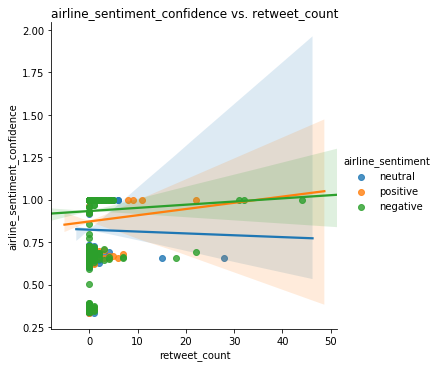

In [189]:
sns.lmplot(x='retweet_count',y='airline_sentiment_confidence',hue='airline_sentiment',data=df)
plt.title('airline_sentiment_confidence vs. retweet_count')
plt.show()

**No relation between 'airline_sentiment_confidence' and retweet_count.**

In [59]:
import torch

In [135]:
from fastai.text import *
import numpy as np
from sklearn.feature_selection import chi2


In [143]:
sPrime=map(lambda s:s.replace('\n',''),df['text'])                               

In [144]:
temp=[]
tempPrime=[]
for count,i in enumerate(list(sPrime)):
    temp.append(i.split(' ')[1:])
    tempPrime.append(' '.join(temp[count]))


In [169]:
#For removing the 'http://'link:
tempAlpha=[]
temp1=[]
temp2=''
for i in tempPrime:
    temp1=re.findall('\S*[\w]+://[\w]+\.[\w]+\/[\w]+\/*[\w]*',i)
    if temp1!=[]:
        for j in range(len(temp1)):
            temp2=i.replace(temp1[j],'')
            i=temp2
    tempAlpha.append(temp2)

#For removing the hashtags:
tempTilda=[]
temp1=[]
temp2=''
for i in tempAlpha:
    temp1=re.findall('#[\w]+',i)
    if temp1!=[]:
        for j in range(len(temp1)):
            temp2=i.replace(temp1[j],'')
            i=temp2  
    tempTilda.append(temp2)

#For removing the '@airlines':
tempTweets=[]
temp1=[]
temp2=''
for i in tempTilda:
    temp1=re.findall('@[\w]+',i)
    if temp1!=[]:
        for j in range(len(temp1)):
            temp2=i.replace(temp1[j],'')
            i=temp2  
    tempTweets.append(temp2)
    


In [183]:
#Most frequent words in each category and word cloud:

stopWords=['the','from','of','in','on','within','into','...']
temp1=[]
temp=[]
tempDictPositive=dict()
tempDictNegative=dict()
tempDictNeutral=dict()

for i in range(len(tempTweets)):
    temp=[]
    temp=tempTweets[i].split(' ')
    for j in temp:
        if list(df['airline_sentiment'])[i]=='positive':
            if j not in stopWords:
                if j not in tempDictPositive.keys():
                    tempDictPositive.update({j:1})
                else:
                    tempDictPositive[j]+=1
        elif list(df['airline_sentiment'])[i]=='negative':
            #print(temp)
            if j not in stopWords:
                if j not in tempDictNegative.keys():
                    tempDictNegative.update({j:1})
                else:
                    tempDictNegative[j]+=1
        elif list(df['airline_sentiment'])[i]=='neutral':
            if j not in stopWords:
                if j not in tempDictNeutral.keys():
                    tempDictNeutral.update({j:1})
                else:
                    tempDictNeutral[j]+=1
            
    

tempDictNegative

KeyboardInterrupt: 

In [171]:
#Doing label-encoding for the categorical labels:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
tempLabels=le.fit_transform(list(df['airline_sentiment'])

14640
14640


In [175]:
#Cleaning the empty tweets:
tweets=[]
labels=[]
for i in range(len(tempTweets)):
    if tempTweets[i]!='':
        tweets.append(tempTweets)
        labels.append(tempLabels)

14627
14627


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')